# Preprocessing
1. Take a look at unique values of each column and recode them.
2. For lobe(部位), merge 16 unique values into 5 categories: LUL,LLL,RML,RLL,RUL.
3. For shape(形状), merge 12 unique values into 4 categories: 类圆形, 团片状, 斑片状, 不规则
4. For 病理, merge 27 values into 4 categories: 腺癌, 鳞癌, 腺鳞癌, 多形性癌
5. Remove CTnumber, name, 肿瘤体积, 转移情况, 增强幅度, ATK from our training features.Remove exon18 and 20 from our outcome variables.
6. Some values in margin(边缘) will be recoded to 0 and 1.
7. Values in Gender will be recoded to 0 for male and 1 for female.
8. Fill missing values in age with mean and that in other binary variables with 0. Drop two lines which contain missing values in outcome.
9. Prepare summary table to show mean values for continuous observations and counts for binary observations.
10. Apply one-hot encoding and min-max scaler.
11. resample observations from minority class 1 for exon19 to be 288 and for exon21 to be 273.
12. Split dataset into 80% train and 20% test subsets in a straitified fashion.

In [1]:
import pandas as pd
import numpy as np

In [2]:
CT=pd.read_excel("/Users/wanhengzhang/Documents/intern/eye recognition.xlsx")

In [3]:
CT.drop(CT.columns[34:],axis=1,inplace=True)

In [4]:
CT.head()

,CTnumber,name,gender,age,smoker,部位,形状,肿瘤最大径（mm）,肿瘤体积（cm³）,边缘,...,纤维化,转移情况,肺门淋巴结肿大,纵隔淋巴结肿大,增强幅度,病理,18号,19号,20号,21号
0,170579,曾亲弟,F,79.0,0,左肺上叶,类圆形,23.33,3.847,1,...,1,0,0,1.0,1,肺腺癌,0.0,0.0,0.0,1.0
1,233046,黄建敬,M,76.0,1,右肺中叶,块状,53.54,28.752,1,...,1,0,0,0.0,2,肺腺癌,0.0,0.0,0.0,0.0
2,283324,何明秀,F,59.0,1,右肺下叶,类圆形,27.41,3.513,1,...,0,0,0,0.0,2,肺腺癌,0.0,0.0,0.0,1.0
3,378550,王学兰,F,85.0,0,右肺上叶,类圆形,61.33,24.173,1,...,1,0,0,1.0,NaN,肺腺癌,0.0,0.0,0.0,1.0
4,385828,陈雪清,F,76.0,0,左肺上叶,类圆形,18.12,2.168,1,...,1,0,1,1.0,NaN,肺腺癌,0.0,1.0,0.0,0.0


<Font color='blue'>
Find unique values in each column and recode them.
<font/>

In [5]:
CT["部位"].unique()

array(['左肺上叶', '右肺中叶', '右肺下叶', '右肺上叶', '左肺下叶', '右肺下叶外基底段', '左下肺', '右上肺',
       '左上肺', '右下肺', '右中肺', '右肺尖', '左肺尖', '右中叶', '右中上肺', '右上叶'], dtype=object)

In [6]:
CT.loc[CT["部位"]=="左肺上叶","部位"]="LUL"
CT.loc[CT["部位"]=="左肺下叶","部位"]="LLL"
CT.loc[CT["部位"]=="左上肺","部位"]="LUL"
CT.loc[CT["部位"]=="左下肺","部位"]="LLL"
CT.loc[CT["部位"]=="左肺尖","部位"]="LUL"
CT.loc[CT["部位"]=="右肺上叶","部位"]="RUL"
CT.loc[CT["部位"]=="右肺中叶","部位"]="RML"
CT.loc[CT["部位"]=="右肺下叶","部位"]="RLL"
CT.loc[CT["部位"]=="右上肺","部位"]="RUL"
CT.loc[CT["部位"]=="右下肺","部位"]="RLL"
CT.loc[CT["部位"]=="右肺下叶外基底段","部位"]="RLL"
CT.loc[CT["部位"]=="右中肺","部位"]="RML"
CT.loc[CT["部位"]=="右肺尖","部位"]="RUL"
CT.loc[CT["部位"]=="右中上肺","部位"]="RML"
CT.loc[CT["部位"]=="右上叶","部位"]="RUL"
CT.loc[CT["部位"]=="右中叶","部位"]="RML"

In [7]:
CT["部位"].unique()

array(['LUL', 'RML', 'RLL', 'RUL', 'LLL'], dtype=object)

In [8]:
CT["形状"].unique()

array(['类圆形', '块状', '浅分叶', '斑片状', '结节', '团块', '团片', '片状', '团片状', '不规则',
       '团状', '结节状'], dtype=object)

In [9]:
CT.loc[CT['形状']=='斑片状',"形状"]="斑片状"
CT.loc[CT['形状']=='磨玻璃',"形状"]="斑片状"
CT.loc[CT['形状']=='片状',"形状"]="斑片状"
CT.loc[CT['形状']=='不规则',"形状"]="不规则"
CT.loc[CT['形状']=='浅分叶',"形状"]="不规则"
CT.loc[CT['形状']=='结节',"形状"]="类圆形"
CT.loc[CT['形状']=='结节状',"形状"]="类圆形"
CT.loc[CT['形状']=='类圆形',"形状"]="类圆形"
CT.loc[CT['形状']=='块状',"形状"]="团片状"
CT.loc[CT['形状']=='团块',"形状"]="团片状"
CT.loc[CT['形状']=='团片',"形状"]="团片状"
CT.loc[CT['形状']=='团片状',"形状"]="团片状"
CT.loc[CT['形状']=='团状',"形状"]="团片状"

In [10]:
CT['形状'].unique()

array(['类圆形', '团片状', '不规则', '斑片状'], dtype=object)

In [11]:
CT["病理"].unique()

array(['肺腺癌', '肺鳞癌', '鳞腺癌', '胸膜腺癌', '浸润性肺腺癌', '肺浸润性腺癌', '黏液腺癌', '浸润性腺癌',
       '浸润性鳞状细胞癌癌', '鳞状细胞癌', '肺多形性癌', '低分化腺癌', '腺癌', '微小浸润性腺癌', '鳞癌',
       '微浸润性腺癌', '浸润性鳞癌', '肺浸润性腺鳞癌', '浸润性癌', '腺癌，中-低分化', '浸润性鳞状细胞癌',
       '原位腺癌伴微浸润', '肺鳞状细胞癌', '微浸润性肺腺癌', '鳞状 细胞癌', '腺癌，中分化，腺泡型', '肺原位腺癌'], dtype=object)

In [12]:
CT.loc[CT['病理']=='低分化腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='肺多形性癌',"病理"]="多形性癌"
CT.loc[CT['病理']=='肺浸润性腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='肺浸润性腺鳞癌',"病理"]="腺鳞癌"
CT.loc[CT['病理']=='肺鳞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='肺鳞状细胞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='肺腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='肺原位腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='浸润性癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='浸润性肺腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='浸润性鳞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='浸润性鳞状细胞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='浸润性鳞状细胞癌癌',"病理"]="腺癌"
CT.loc[CT['病理']=='浸润性腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='鳞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='鳞腺癌',"病理"]="腺鳞癌"
CT.loc[CT['病理']=='鳞状 细胞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='鳞状细胞癌',"病理"]="鳞癌"
CT.loc[CT['病理']=='黏液腺癌',"病理"]='腺癌'
CT.loc[CT['病理']=='微浸润性肺腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='微浸润性腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='微小浸润性腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='腺癌，中-低分化',"病理"]="腺癌"
CT.loc[CT['病理']=='腺癌，中分化，腺泡型',"病理"]="腺癌"
CT.loc[CT['病理']=='胸膜腺癌',"病理"]="腺癌"
CT.loc[CT['病理']=='原位腺癌伴微浸润',"病理"]="腺癌"

In [13]:
CT["病理"].unique()

array(['腺癌', '鳞癌', '腺鳞癌', '多形性癌'], dtype=object)

In [14]:
CT.drop("18号",axis=1,inplace=True)
CT.drop("20号",axis=1,inplace=True)

In [15]:
CT

,CTnumber,name,gender,age,smoker,部位,形状,肿瘤最大径（mm）,肿瘤体积（cm³）,边缘,...,钙化,肺气肿,纤维化,转移情况,肺门淋巴结肿大,纵隔淋巴结肿大,增强幅度,病理,19号,21号
0,170579,曾亲弟,F,79.0,0,LUL,类圆形,23.33,3.847,1,...,0,0,1,0,0,1.0,1,腺癌,0.0,1.0
1,233046,黄建敬,M,76.0,1,RML,团片状,53.54,28.752,1,...,0,0,1,0,0,0.0,2,腺癌,0.0,0.0
2,283324,何明秀,F,59.0,1,RLL,类圆形,27.41,3.513,1,...,0,0,0,0,0,0.0,2,腺癌,0.0,1.0
3,378550,王学兰,F,85.0,0,RUL,类圆形,61.33,24.173,1,...,0,0,1,0,0,1.0,NaN,腺癌,0.0,1.0
4,385828,陈雪清,F,76.0,0,LUL,类圆形,18.12,2.168,1,...,0,0,1,0,1,1.0,NaN,腺癌,1.0,0.0
5,406957,沈友书,F,80.0,0,RLL,类圆形,33.82,7.743,1,...,0,0,1,0,1,0.0,1,腺癌,0.0,0.0
6,411365,陈耀才,M,82.0,0,LLL,类圆形,36.77,15.483,1,...,0,0,1,0,0,1.0,1,腺癌,0.0,0.0
7,424813,秦文安,M,47.0,0,LUL,类圆形,35.24,11.138,1,...,0,0,0,0,0,0.0,NaN,腺癌,1.0,0.0
8,425769,曾伟英,F,61.0,0,LUL,类圆形,15.18,0.963,0,...,0,0,0,0,0,0.0,NaN,腺癌,0.0,1.0
9,427486,聂振高,M,40.0,1,LUL,类圆形,33.02,11.171,1,...,0,0,0,1,0,0.0,3,腺癌,0.0,0.0


In [16]:
CT.loc[CT["边缘"]=="模糊","边缘"]=0
CT.loc[CT["边缘"]=="光整","边缘"]=1
CT.loc[CT['边缘']=='尚光整','边缘']=1
CT.loc[CT["边缘"]=="尚清","边缘"]=1
CT.loc[CT["边缘"]=="不清","边缘"]=0
CT.loc[CT["边缘"]=="清晰","边缘"]=1
CT.loc[CT["边缘"]=="尚请","边缘"]=1
CT.loc[CT["边缘"]=="模糊00","边缘"]=0
CT.loc[CT["边缘"]=="毛糙","边缘"]=0

In [17]:
CT["分叶征"].unique()

array([0, 1])

In [18]:
CT.drop("肿瘤体积（cm³）",axis=1,inplace=True)
CT.drop("增强幅度",axis=1,inplace=True)

In [19]:
CT.loc[CT["gender"]=="F","gender"]= 1
CT.loc[CT["gender"]=="f","gender"]= 1
CT.loc[CT["gender"]=="M","gender"]= 0

In [20]:
CT['gender'].unique()

array([1, 0], dtype=object)

In [21]:
CT.loc[CT["转移情况"]!=0,"转移情况"]=1

In [22]:
CT["转移情况"].unique()

array([0, 1], dtype=object)

In [23]:
CT.loc[CT["smoker"]=="F","smoker"]=0
CT.loc[CT['smoker']==3,'smoker']=1

In [24]:
CT['smoker'].unique()

array([0, 1], dtype=object)

In [25]:
CT.loc[CT["磨玻璃影"]==2,"磨玻璃影"]=1

In [26]:
CT["磨玻璃影"].unique()

array([0, 1])

In [27]:
CT['空泡'].unique()

array([ 0,  1, 11])

In [28]:
CT.loc[CT['空泡']==11]=1

<font color='blue'>
Find if there are missing values in the dataset
</font>

In [29]:
CT.isnull().sum()

CTnumber     1
name         0
gender       0
age          1
smoker       0
部位           0
形状           0
肿瘤最大径（mm）    0
边缘           0
分叶征          0
毛刺征          0
磨玻璃影         0
密度           0
空泡           0
空洞           0
空气支气管征       0
胸膜增厚         0
肿瘤坏死         1
卫星结节         2
结节           2
胸膜凹陷征        1
钙化           0
肺气肿          0
纤维化          0
转移情况         0
肺门淋巴结肿大      0
纵隔淋巴结肿大      1
病理           0
19号          2
21号          2
dtype: int64

<font color='blue'>
Fill age with mean and others with 0.
<font/>

In [30]:
CT.loc[:,'age']=CT.loc[:,'age'].fillna(60.66)

In [31]:
CT.iloc[:,0:-2]=CT.iloc[:,0:-2].fillna(value=0)

<font color='blue'>
Drop missing value for last two columns since they are outcome variables.
<font/>

In [32]:
CT.dropna(inplace=True,axis=0)

# Summary Statistical Table

<font color='blue'>
For variables"age","密度"and "肿瘤最大径（mm）" ,we can see their mean and std.
For binary variables, we can see their counts/Total(%)
<font/>

In [33]:
CT.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,358.0,0.441341,0.497242,0.0,0.00,0.0,1.0000,1.0
age,358.0,60.834246,12.393782,1.0,53.00,61.0,69.0000,90.0
smoker,358.0,0.351955,0.478249,0.0,0.00,0.0,1.0000,1.0
肿瘤最大径（mm）,358.0,28.367570,15.027365,1.0,17.85,25.0,35.9025,93.0
边缘,358.0,0.592179,0.492117,0.0,0.00,1.0,1.0000,1.0
分叶征,358.0,0.547486,0.498437,0.0,0.00,1.0,1.0000,1.0
毛刺征,358.0,0.837989,0.368977,0.0,1.00,1.0,1.0000,1.0
磨玻璃影,358.0,0.240223,0.427817,0.0,0.00,0.0,0.0000,1.0
密度,358.0,-39.703911,174.668350,-780.0,-8.25,40.0,50.7500,77.0
空泡,358.0,0.181564,0.386024,0.0,0.00,0.0,0.0000,1.0


<font color='blue'>
Also, providing counts numbers of each class for binary variables. (Ignore age,density and maximum diameters)
<font/>

In [139]:
CT.sum()

gender       158.000000
age          240.681573
smoker       126.000000
肿瘤最大径（mm）    106.495543
边缘           212.000000
分叶征          196.000000
毛刺征          300.000000
磨玻璃影          86.000000
密度           309.248541
空泡            65.000000
空洞            20.000000
空气支气管征        82.000000
胸膜增厚         158.000000
肿瘤坏死          43.000000
卫星结节          18.000000
结节           191.000000
胸膜凹陷征        233.000000
钙化            21.000000
肺气肿           31.000000
纤维化          110.000000
转移情况         104.000000
肺门淋巴结肿大      101.000000
纵隔淋巴结肿大      162.000000
19号           70.000000
21号           85.000000
部位_LLL        73.000000
部位_LUL        88.000000
部位_RLL        47.000000
部位_RML        65.000000
部位_RUL        84.000000
形状_不规则         4.000000
形状_团片状        94.000000
形状_斑片状         6.000000
形状_类圆形       253.000000
病理_多形性癌        1.000000
病理_腺癌        308.000000
病理_腺鳞癌         3.000000
病理_鳞癌         45.000000
dtype: float64

<font color='blue'>
one-hot coded categorical variables: '形状','病理','部位'
<font/>

In [34]:
CT = CT.iloc[:,2:]

In [35]:
CT = pd.get_dummies(CT)
CT.drop('形状_1',axis=1,inplace=True)
CT.drop('病理_1',axis=1,inplace=True)
CT.drop('部位_1',axis=1,inplace=True)

In [36]:
#Display the first 5 rows of the dataset after one-hot encoding
CT.head()

,gender,age,smoker,肿瘤最大径（mm）,边缘,分叶征,毛刺征,磨玻璃影,密度,空泡,...,部位_RML,部位_RUL,形状_不规则,形状_团片状,形状_斑片状,形状_类圆形,病理_多形性癌,病理_腺癌,病理_腺鳞癌,病理_鳞癌
0,1,79.0,0,23.33,1,0,1,0,38,0,...,0,0,0,0,0,1,0,1,0,0
1,0,76.0,1,53.54,1,0,1,0,50,0,...,1,0,0,1,0,0,0,1,0,0
2,1,59.0,1,27.41,1,1,1,0,5,0,...,0,0,0,0,0,1,0,1,0,0
3,1,85.0,0,61.33,1,0,1,0,55,0,...,0,1,0,0,0,1,0,1,0,0
4,1,76.0,0,18.12,1,0,1,1,-260,0,...,0,0,0,0,0,1,0,1,0,0


<font color='blue'>
Apply Min-Max scaler
<font/>

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler= MinMaxScaler()
minmaxscaler.fit(CT.loc[:,['age','密度','肿瘤最大径（mm）']])
CT.loc[:,['age','密度','肿瘤最大径（mm）']]=minmaxscaler.transform(CT.loc[:,['age','密度','肿瘤最大径（mm）']])

In [38]:
CT.head()

,gender,age,smoker,肿瘤最大径（mm）,边缘,分叶征,毛刺征,磨玻璃影,密度,空泡,...,部位_RML,部位_RUL,形状_不规则,形状_团片状,形状_斑片状,形状_类圆形,病理_多形性癌,病理_腺癌,病理_腺鳞癌,病理_鳞癌
0,1,0.876404,0,0.242717,1,0,1,0,0.954492,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0.842697,1,0.571087,1,0,1,0,0.968495,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0.651685,1,0.287065,1,1,1,0,0.915986,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0.943820,0,0.655761,1,0,1,0,0.974329,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0.842697,0,0.186087,1,0,1,1,0.606768,0,...,0,0,0,0,0,1,0,1,0,0


<font color='blue'>
Upsample Minority Class
<font/>

In [39]:
from sklearn.utils import resample

In [40]:
CT19 = CT.drop('21号',axis=1)
CT21 = CT.drop('19号',axis=1)

In [41]:
CT19['19号'].value_counts()

0.0    288
1.0     70
Name: 19号, dtype: int64

In [42]:
CT21['21号'].value_counts()

0.0    273
1.0     85
Name: 21号, dtype: int64

In [43]:
CT19_majority = CT19[CT19['19号']==0]
CT19_minority = CT19[CT19['19号']==1]
CT19_minority_upsampled = resample(CT19_minority,replace=True,n_samples=288,random_state=222)
CT21_majority = CT21[CT21['21号']==0]
CT21_minority = CT21[CT21['21号']==1]
CT21_minority_upsampled = resample(CT21_minority,replace=True,n_samples=275,random_state=222)
CT19_balanced = pd.concat([CT19_majority,CT19_minority_upsampled])
CT21_balanced = pd.concat([CT21_majority,CT21_minority_upsampled])

In [44]:
CT19_balanced['19号'].value_counts()

1.0    288
0.0    288
Name: 19号, dtype: int64

In [45]:
CT21_balanced['21号'].value_counts()

1.0    275
0.0    273
Name: 21号, dtype: int64

After resampling, we get equal number of observations for two outcome classes.

<font color='blue'>
Get features X and outcomes y
</font>

In [46]:
X19=CT19_balanced.drop('19号',axis=1)
y19=CT19_balanced['19号']
X21=CT21_balanced.drop('21号',axis=1)
y21=CT21_balanced['21号']

<font color='blue'>
Training and Testing Split
<font/>

In [47]:
#test size is 1/5, use stratify
from sklearn.model_selection import train_test_split
X19_train,X19_test,y19_train,y19_test=train_test_split(X19,y19,test_size=0.2,stratify=y19,random_state=22)
X21_train,X21_test,y21_train,y21_test=train_test_split(X21,y21,test_size=0.2,stratify=y21,random_state=22)

In [136]:
#Print exon19 subset shape
print("X19_train Shape:",X19_train.shape)
print("X19_test Shape:",X19_test.shape)
print("y19_train Shape",y19_train.shape)
print("y19_test Shape",y19_test.shape)

X19_train Shape: (460, 36)
X19_test Shape: (116, 36)
y19_train Shape (460,)
y19_test Shape (116,)


In [137]:
#Print exon21 subset shape
print("X21_train Shape:",X21_train.shape)
print("X21_test Shape:",X21_test.shape)
print("y21_train Shape",y21_train.shape)
print("y21_test Shape",y21_test.shape)

X21_train Shape: (438, 36)
X21_test Shape: (110, 36)
y21_train Shape (438,)
y21_test Shape (110,)


# Exon19

<font color='blue'>
Check train and test distribution
<font/>

In [50]:
X_train_mean=X19_train.describe().T['mean'].tolist()
X_test_mean=X19_test.describe().T['mean'].tolist()

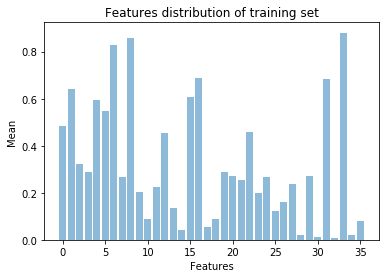

In [51]:
import matplotlib.pyplot as plt
plt.bar(np.arange(36), X_train_mean, align='center',alpha=0.5)
plt.ylabel('Mean')
plt.xlabel('Features')
plt.title('Features distribution of training set')
plt.show()

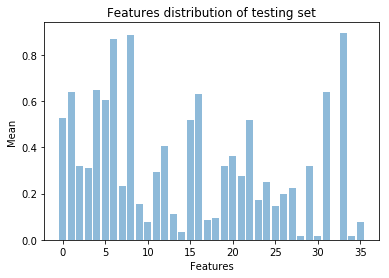

In [52]:
import matplotlib.pyplot as plt
plt.bar(np.arange(36), X_test_mean, align='center',alpha=0.5)
plt.ylabel('Mean')
plt.xlabel('Features')
plt.title('Features distribution of testing set')
plt.show()

We can see from the tables above that the train and test set observations distributions are similar.

# Logistic Regression

1. Fit a baseline logistic regression with L1-norm. 
2. Split the train set into 5 folds and implement cross validation.
3. Draw ROC curve and calculate AUC to show prediction results on cross validation sets.
4. Tune hyperparameters using grid search cross validition on the training set.
5. Choose the best parameters and refit the model.
6. Repeat 3 on new model.
7. Draw ROC curve and calculate on test set.
8. Show confusion matrix and calculate accuracy, sensitivity and specificity on test set.

<font color='blue'>
Fit a baseline model.
<font/>

In [53]:
from sklearn.linear_model import LogisticRegression
log19 = LogisticRegression(penalty="l1",solver="liblinear",random_state=22,max_iter=300)
log19.fit(X19_train,y19_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=22, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<font color='blue'>
Define a function to draw cross validation ROC curve showing prediction results on validition sets.
<font/>

In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(X19_train,y19_train)
kf.split(X19_train,y19_train)

<generator object _BaseKFold.split at 0x1a170390a0>

In [56]:
def cv_roc(classifier,X,y):    
    from sklearn import metrics
    from scipy import interp
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    for train, test in kf.split(X, y):
        
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])[:,1]
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_)
        roc_auc = metrics.auc(fpr, tpr)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for cross validation')
    plt.legend(loc="lower right")
    plt.show()

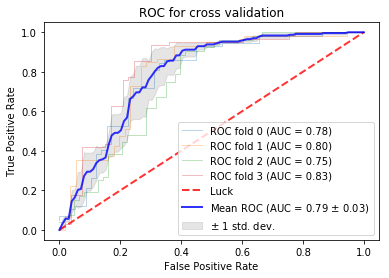

Cross Validation Accuracy set: [ 0.69565217  0.7173913   0.70652174  0.69565217  0.76086957]
Average Cross Validation Accuracy:0.715217391304


In [61]:
# Draw ROC curve for cross validation
cv_roc(log19,np.array(X19_train),np.array(y19_train))
#Calculate mean accuracy on cross validition sets and train set.
from sklearn.model_selection import cross_val_score
cvscores19=cross_val_score(log19, X19_train,y19_train, scoring='accuracy', cv = 5)
print("Cross Validation Accuracy set:",cvscores19)
print("Average Cross Validation Accuracy:"+str(cvscores19.mean()))

<font color='blue'>
Then,implement grid search cross validition to tune 'C'
<font/>

In [58]:
from sklearn import grid_search
parameters = {'C':[0.01,0.1,1,10,100]}
new_log19 = grid_search.GridSearchCV(log19, parameters)
new_log19.fit(X19_train,y19_train)
new_log19.best_params_

/Users/wanhengzhang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/wanhengzhang/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 10}

<font color='blue'>
The best parameter C we find is 10 and the model will be refit with C=10
<font/>

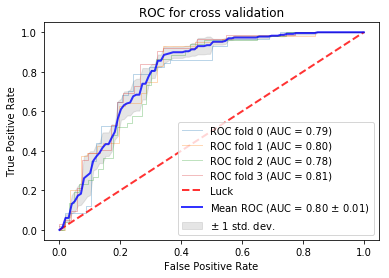

Cross Validation Accuracy set: [ 0.7173913   0.7173913   0.75        0.68478261  0.77173913]
Average Cross Validition Accuracy:0.728260869565


In [60]:
# Refit the model and apply cross validition on training set.
cv_roc(new_log19,np.array(X19_train),np.array(y19_train))
cvscores19=cross_val_score(new_log19, X19_train,y19_train, scoring='accuracy', cv = 5)
print("Cross Validation Accuracy set:",cvscores19)
print("Average Cross Validition Accuracy:"+str(cvscores19.mean()))

<font color='blue'>
Evaluate new model permance on test set.
<font/>

In [104]:
#Draw ROC curve and calculate AUC
def test_roc(classifier,X_test,y_test):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    fpr,tpr,thresholds=roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
    auc=metrics.auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='Test (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC on test set')
    plt.legend(loc="lower right")
    plt.show()
    print("AUC = %0.3f" % auc)

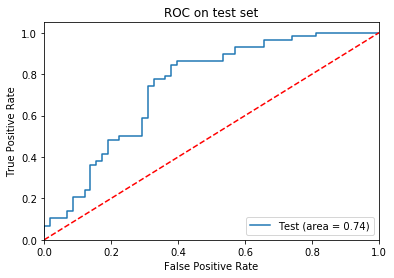

AUC = 0.740
train accuracy = 0.745652
test accuracy = 0.646552


In [105]:
# evaluate model performance on test set
test_roc(new_log19,np.array(X19_test),np.array(y19_test))
print("train accuracy = %0.6f" % new_log19.score(X19_train,y19_train))
print("test accuracy = %0.6f" % new_log19.score(X19_test,y19_test))

In [64]:
#Provide sensitivity and specifity.
from sklearn.metrics import classification_report
print(classification_report(y19_test,new_log19.predict(X19_test)))

             precision    recall  f1-score   support

        0.0       0.63      0.71      0.67        58
        1.0       0.67      0.59      0.62        58

avg / total       0.65      0.65      0.65       116



In [65]:
#Provide confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y19_test, new_log19.predict(X19_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[41 17]
 [24 34]]


# SVM

<font color='blue'>
Baseline Model
<font/>

In [66]:
from sklearn.svm import SVC
svm19=SVC(probability=True,random_state=12,C=1)
svm19.fit(X19_train,y19_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

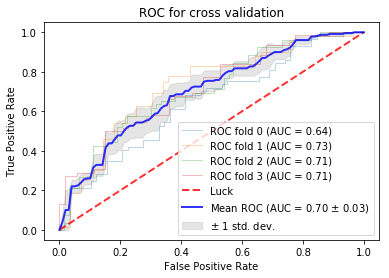

[ 0.57608696  0.7173913   0.68478261  0.58695652  0.64130435]
Average Accuracy: 0.6413 (+/- 0.1091)


In [67]:
cv_roc(svm19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(svm19, X19_train, y19_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

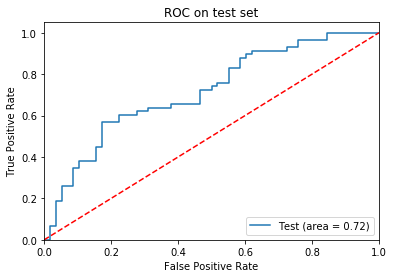

AUC = 0.717
Test Accuracy: 0.620689655172
Train Accuracy 0.669565217391


In [106]:
test_roc(svm19,X19_test,y19_test)
print('Test Accuracy:',svm19.score(X19_test,y19_test))
print('Train Accuracy',svm19.score(X19_train,y19_train))

<font color='blue'>
Optimized by cross-validated grid-search over a parameter grid.
<font/>


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'C':[0.001,0.001,0.1,1,10]}
cvsvm19=GridSearchCV(svm19,parameters,cv=5)
cvsvm19.fit(X19_train,y19_train)
cvsvm19.best_params_

{'C': 10}

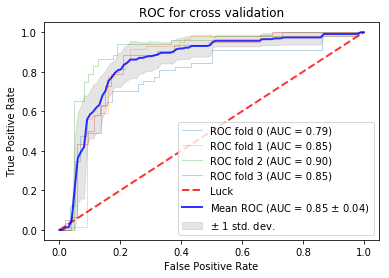

[ 0.72826087  0.80434783  0.73913043  0.76086957  0.82608696]
Average Accuracy: 0.7717 (+/- 0.0753)


In [70]:
# See cross validition result on new model.
cv_roc(cvsvm19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(cvsvm19, X19_train, y19_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

<font color='blue'>
We can see from the figure above that the cross validation result is significantly improved when applying C=10. Then apply the model on test set and see its accuracy
<font/>

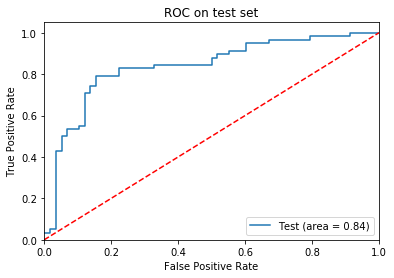

AUC = 0.837
Test Accuracy = 0.75
Train Accuracy = 0.847826086957


In [107]:
# Apply the model on test set and see its accuracy
test_roc(cvsvm19,X19_test,y19_test)
print('Test Accuracy =',cvsvm19.score(X19_test,y19_test))
print('Train Accuracy =',cvsvm19.score(X19_train,y19_train))

In [72]:
#Provide sensitivity and specifity.
from sklearn.metrics import classification_report
print(classification_report(y19_test,cvsvm19.predict(X19_test)))

             precision    recall  f1-score   support

        0.0       0.81      0.66      0.72        58
        1.0       0.71      0.84      0.77        58

avg / total       0.76      0.75      0.75       116



In [73]:
#Provide confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y19_test, cvsvm19.predict(X19_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[38 20]
 [ 9 49]]


# Adaboost

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada19 = AdaBoostClassifier(n_estimators=100)                            

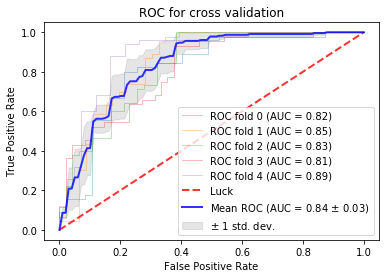

[ 0.79347826  0.80434783  0.77173913  0.77173913  0.84782609]
Average Accuracy: 0.7978 (+/- 0.0560)


In [89]:
cv_roc(ada19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(ada19, X19_train, y19_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [97]:
param_grid = {"n_estimators": [100,200,300,400,500] }
cvada19 = GridSearchCV(ada19, param_grid=param_grid)
cvada19.fit(X19_train, y19_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
cvada19.best_params_

{'n_estimators': 400}

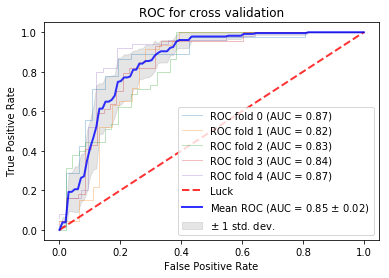

[ 0.81521739  0.81521739  0.79347826  0.81521739  0.86956522]
Average Accuracy: 0.8217 (+/- 0.0507)


In [101]:
cv_roc(cvada19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(cvada19, X19_train, y19_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

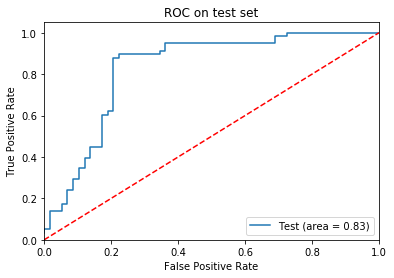

AUC = 0.827
Train Accuracy: 0.963043478261
Test Accuracy: 0.827586206897


In [109]:
test_roc(cvada19,X19_test,y19_test)
print('Train Accuracy:',cvada19.score(X19_train,y19_train))
print('Test Accuracy:',cvada19.score(X19_test,y19_test))

In [103]:
print(classification_report(y19_test,cvada19.predict(X19_test)))

             precision    recall  f1-score   support

        0.0       0.88      0.76      0.81        58
        1.0       0.79      0.90      0.84        58

avg / total       0.83      0.83      0.83       116



In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y21_test, cvada19.predict(X21_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[35 20]
 [46  9]]


# Random Forest

<font color='blue'>
Baseline Model
<font/>

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf19 = RandomForestClassifier(random_state=0)
#Train the model on training data
rf19.fit(X19_train,y19_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

<font color='blue'>
Cross Validation
<font/>

In [75]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X19_train,y19_train)
kf.split(X19_train,y19_train)

<generator object _BaseKFold.split at 0x1a1878faf0>

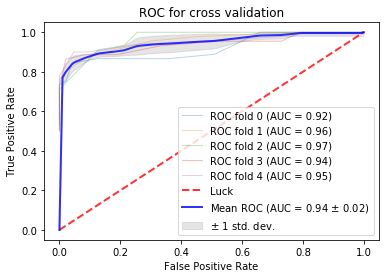

[ 0.85869565  0.86956522  0.92391304  0.80434783  0.92391304]
Average Accuracy: 0.8761 (+/- 0.0897)


In [76]:
cv_roc(rf19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(rf19, X19_train, y19_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

<font color='blue'>
Using Grid search cross validation to select best parameters
<font/>

In [77]:
from sklearn.model_selection import GridSearchCV
param_dist = {"max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
cvrf19 = GridSearchCV(rf19, param_grid=param_dist)
cvrf19.fit(X19_train, y19_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
#Show the best parameters for RF model
cvrf19.best_params_

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}

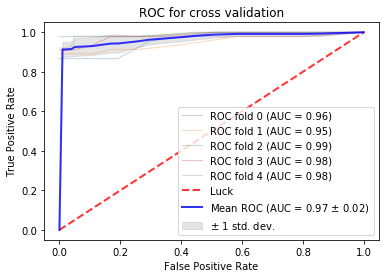

Cross Validation Accuracy set: [ 0.91304348  0.89130435  0.95652174  0.83695652  0.97826087]
Average Cross Validation Accuracy: 0.9152 (+/- 0.0995)


In [79]:
#Draw ROC curve on the new model.
cv_roc(cvrf19,np.array(X19_train),np.array(y19_train))
scores = cross_val_score(cvrf19, X19_train, y19_train, cv=5)
print("Cross Validation Accuracy set:",scores)
print("Average Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

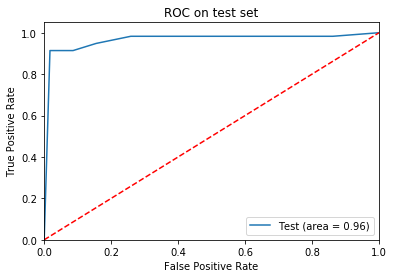

AUC = 0.965
Test Accuracy: 0.896551724138
Train Accuracy 0.989130434783


In [108]:
test_roc(cvrf19,X19_test,y19_test)
print('Test Accuracy:',cvrf19.score(X19_test,y19_test))
print('Train Accuracy',cvrf19.score(X19_train,y19_train))

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y19_test,cvrf19.predict(X19_test)))

             precision    recall  f1-score   support

        0.0       0.94      0.84      0.89        58
        1.0       0.86      0.95      0.90        58

avg / total       0.90      0.90      0.90       116



In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y19_test, cvrf19.predict(X19_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[49  9]
 [ 3 55]]


# Exon21

In [471]:
X_train_mean=X21_train.describe().T['mean'].tolist()
X_test_mean=X21_test.describe().T['mean'].tolist()

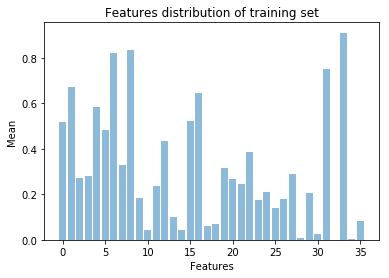

In [472]:
plt.bar(np.arange(36), X_train_mean, align='center',alpha=0.5)
plt.ylabel('Mean')
plt.xlabel('Features')
plt.title('Features distribution of training set')
plt.show()

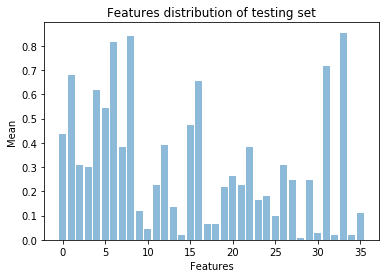

In [473]:
plt.bar(np.arange(36), X_test_mean, align='center',alpha=0.5)
plt.ylabel('Mean')
plt.xlabel('Features')
plt.title('Features distribution of testing set')
plt.show()

We can see from the tables above that the train and test set observations distributions are similar.

# Logistic Regression

In [111]:
log21 = LogisticRegression(penalty="l1",solver="liblinear",random_state=22,max_iter=200,C=1)
log21.fit(X21_train,y21_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=22, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

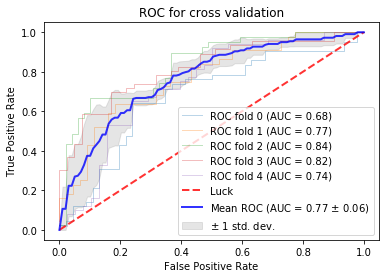

Cross Validation Accuracy set: [ 0.63636364  0.68181818  0.73863636  0.71264368  0.66666667]
Average Cross Validation Accuracy: 0.6872 (+/- 0.0712)


In [112]:
cv_roc(log21,np.array(X21_train),np.array(y21_train))
scores = cross_val_score(log21, X21_train, y21_train, cv=5)
print("Cross Validation Accuracy set:",scores)
print("Average Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [113]:
cvscores21=cross_val_score(log21, X21_train,y21_train, scoring='accuracy', cv = 5)
print(cvscores21)
print("average cross validition Accuracy:"+str(cvscores21.mean()))

[ 0.63636364  0.68181818  0.73863636  0.71264368  0.66666667]
average cross validition Accuracy:0.687225705329


<font color='blue'>
Use grid search cv to tune parameters.
<font/>

In [114]:
parameters = {'C':[0.01,0.1,1,10,100]}
new_log21 = grid_search.GridSearchCV(log21, parameters)
new_log21.fit(X19_train,y19_train)
new_log21.best_params_

{'C': 10}

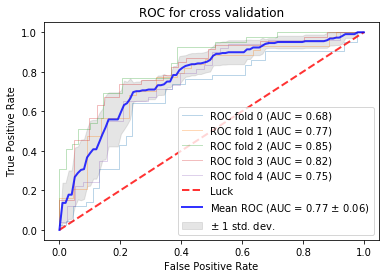

Cross Validation Accuracy set: [ 0.64772727  0.71590909  0.77272727  0.73563218  0.65517241]
Average Cross Validation Accuracy: 0.7054 (+/- 0.0955)


In [115]:
cv_roc(new_log21,np.array(X21_train),np.array(y21_train))
scores = cross_val_score(new_log21, X21_train, y21_train, cv=5)
print("Cross Validation Accuracy set:",scores)
print("Average Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

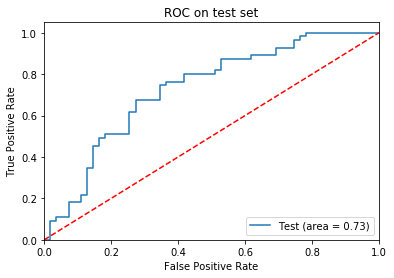

AUC = 0.728
Test Accuracy: 0.681818181818
Train Accuracy 0.74200913242


In [116]:
#Draw ROC curve and calculate AUC on test set
test_roc(new_log21,X21_test,y21_test)
print('Test Accuracy:',new_log21.score(X21_test,y21_test))
print('Train Accuracy',new_log21.score(X21_train,y21_train))

In [134]:
print(classification_report(y21_test,new_log21.predict(X21_test)))

             precision    recall  f1-score   support

        0.0       0.72      0.60      0.65        55
        1.0       0.66      0.76      0.71        55

avg / total       0.69      0.68      0.68       110



In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y21_test, new_log21.predict(X21_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[33 22]
 [13 42]]


# SVM

In [118]:
svm21=SVC(probability=True,C=1)
svm21.fit(X21_train,y21_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

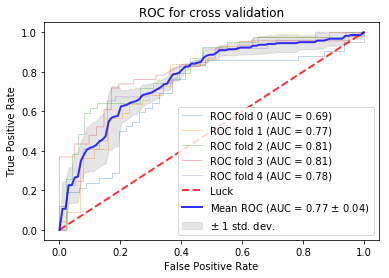

Cross Validation Accuracy set: [ 0.64772727  0.69318182  0.75        0.70114943  0.66666667]
Average Cross Validation Accuracy: 0.6917 (+/- 0.0696)


In [119]:
cv_roc(svm21,np.array(X21_train),np.array(y21_train))
scores=cross_val_score(svm21, X21_train,y21_train, scoring='accuracy', cv = 5)
print("Cross Validation Accuracy set:",scores)
print("Average Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [120]:
parameters = {'C':[0.001,0.001,0.1,1,10]}
cvsvm21=GridSearchCV(svm21,parameters,cv=5)
cvsvm21.fit(X21_train,y21_train)
cvsvm21.best_params_

{'C': 10}

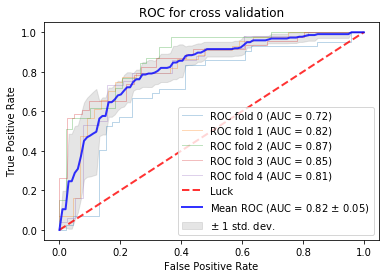

Cross Validation Accuracy set: [ 0.67045455  0.78409091  0.80681818  0.7816092   0.71264368]
Average Cross Validation Accuracy: 0.7511 (+/- 0.1024)


In [121]:
cv_roc(cvsvm21,np.array(X21_train),np.array(y21_train))
scores = cross_val_score(cvsvm21, X21_train, y21_train, cv=5)
print("Cross Validation Accuracy set:",scores)
print("Average Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

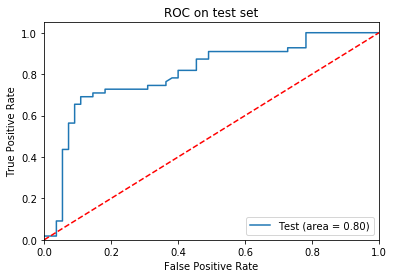

AUC = 0.805
Test Accuracy: 0.7
Train Accuracy 0.819634703196


In [122]:
#Draw ROC curve and calculate AUC on test set
test_roc(cvsvm21,X21_test,y21_test)
print('Test Accuracy:',cvsvm21.score(X21_test,y21_test))
print('Train Accuracy',cvsvm21.score(X21_train,y21_train))

In [125]:
print(classification_report(y21_test,cvsvm21.predict(X21_test)))

             precision    recall  f1-score   support

        0.0       0.74      0.62      0.67        55
        1.0       0.67      0.78      0.72        55

avg / total       0.71      0.70      0.70       110



In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y21_test, cvsvm21.predict(X21_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[34 21]
 [12 43]]


# Random Forest

In [126]:
rf21 = RandomForestClassifier(random_state=0)
#Train the model on training data
rf21.fit(X21_train,y21_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

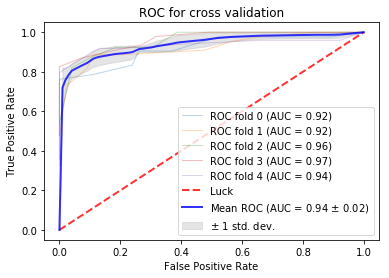

[ 0.80681818  0.82954545  0.86363636  0.85057471  0.93103448]
Average Accuracy: 0.8563 (+/- 0.0841)


In [127]:
cv_roc(rf21,np.array(X21_train),np.array(y21_train))
scores = cross_val_score(rf21, X21_train, y21_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [128]:
param_dist = {"max_depth": [3, 10,None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
cvrf21 = GridSearchCV(rf21, param_grid=param_dist)
cvrf21.fit(X21_train, y21_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 10, None], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
#To see the best parameters
cvrf21.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None}

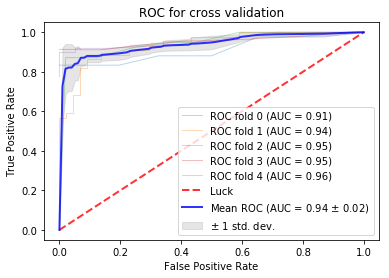

[ 0.85227273  0.89772727  0.85227273  0.85057471  0.94252874]
Average Accuracy: 0.8791 (+/- 0.0728)


In [130]:
cv_roc(cvrf21,np.array(X21_train),np.array(y21_train))
scores = cross_val_score(cvrf21, X21_train, y21_train, cv=5)
print(scores)
print("Average Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

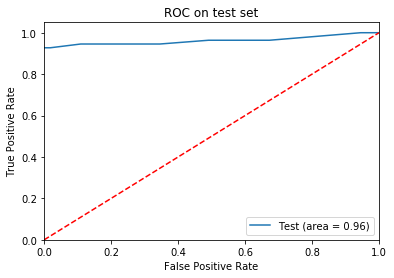

AUC = 0.962
Test Accuracy: 0.890909090909
Train Accuracy 0.98401826484


In [131]:
#Draw ROC curve and calculate AUC on test set
test_roc(cvrf21,X21_test,y21_test)
print('Test Accuracy:',cvrf21.score(X21_test,y21_test))
print('Train Accuracy',cvrf21.score(X21_train,y21_train))

In [135]:
print(classification_report(y21_test,cvrf21.predict(X21_test)))

             precision    recall  f1-score   support

        0.0       0.94      0.84      0.88        55
        1.0       0.85      0.95      0.90        55

avg / total       0.90      0.89      0.89       110



In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y21_test, cvrf21.predict(X21_test))
print("Confusion Matrix is:")
print(confusion_matrix)

Confusion Matrix is:
[[46  9]
 [ 3 52]]


# Summary

For exon19 mutation, I apply logistic regression, SVM, random forest and adaboost.The results are:


| Algorithm         |Train Accuracy |Test Accuracy|AUC  |
|-------------------|---------------|-------------|-----|
|Logistic Regression|0.746          |0.647        |0.740|
|SVM                |0.848          |0.750        |0.837|
|Adaboost           |0.963          |0.828        |0.827|
|Random Forest      |0.989          |0.897        |0.965|

For exon21 mutation, I apply logistic regression, SVM, random forest.The results are:

| Algorithm         |Train Accuracy |Test Accuracy|AUC  |
|-------------------|---------------|-------------|-----|
|Logistic Regression|0.742          |0.682        |0.728|
|SVM                |0.820          |0.700        |0.805|
|Random Forest      |0.984          |0.891        |0.962|